In [2]:
# Stock Market Analysis Project

# Step 1: Import Required Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Step 2: Data Collection
# Fetch stock data for a specific stock (e.g., Tesla - TSLA)
ticker = 'TSLA'
stock_data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
stock_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


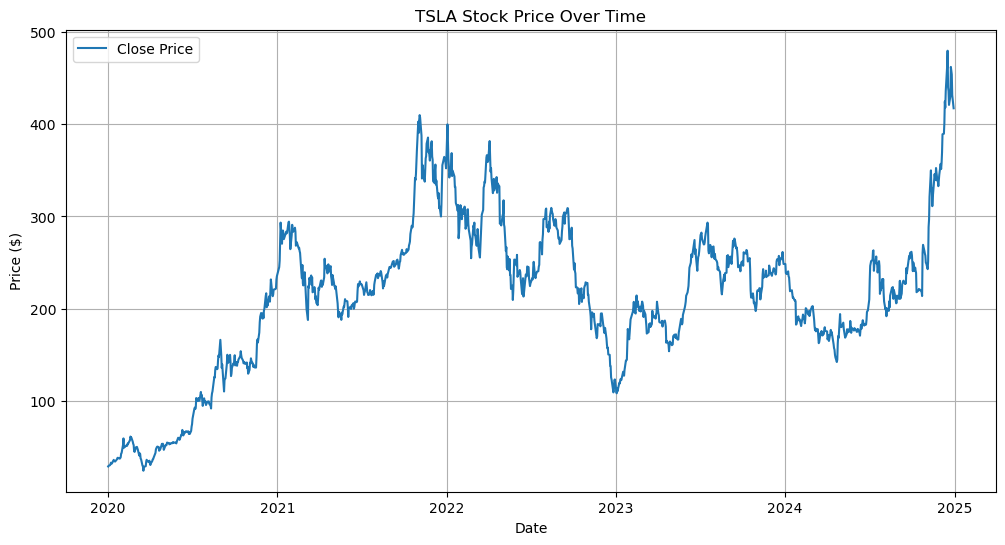

In [4]:
# Step 3: Data Exploration
# Plot the closing price to identify historical trends
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Analyze impact of major events (example only, interpret as needed)
# For simplicity, let's mark COVID-19 market crash (March 2020)
plt.axvline(pd.to_datetime("2020-03-01"), color='red', linestyle='--', label='COVID-19 Crash')
plt.legend()

In [6]:
# Step 4: Data Preprocessing
# Check for missing data
print(stock_data.isnull().sum())

# Interpolate missing values
stock_data.interpolate(method='linear', inplace=True)

# Convert index to datetime (already done by yfinance, but shown for completeness)
stock_data.index = pd.to_datetime(stock_data.index)

Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64


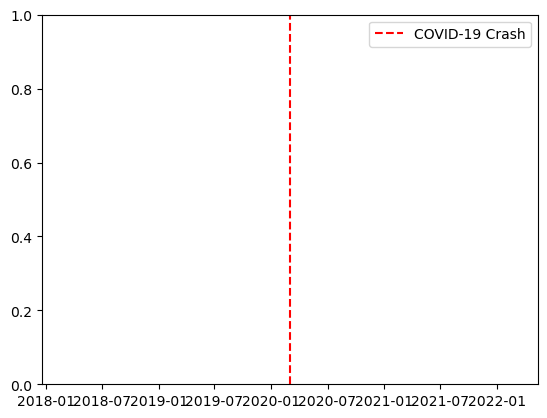

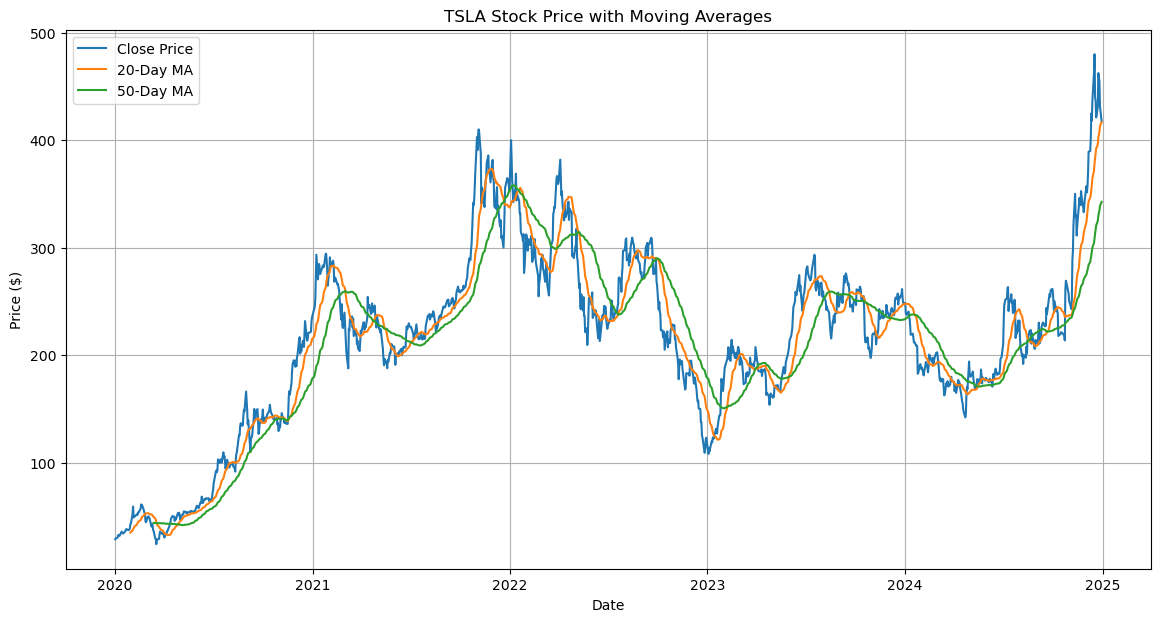

In [8]:
# Step 5: Exploratory Data Analysis (EDA)
# Visualize with moving averages and volatility
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Volatility'] = stock_data['Close'].rolling(window=20).std()

plt.figure(figsize=(14,7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA20'], label='20-Day MA')
plt.plot(stock_data['MA50'], label='50-Day MA')
plt.title(f'{ticker} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Step 6: Feature Selection - Technical Indicators
# RSI (Relative Strength Index)
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

In [12]:
# MACD (Moving Average Convergence Divergence)
exp1 = stock_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = exp1 - exp2
stock_data['Signal Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

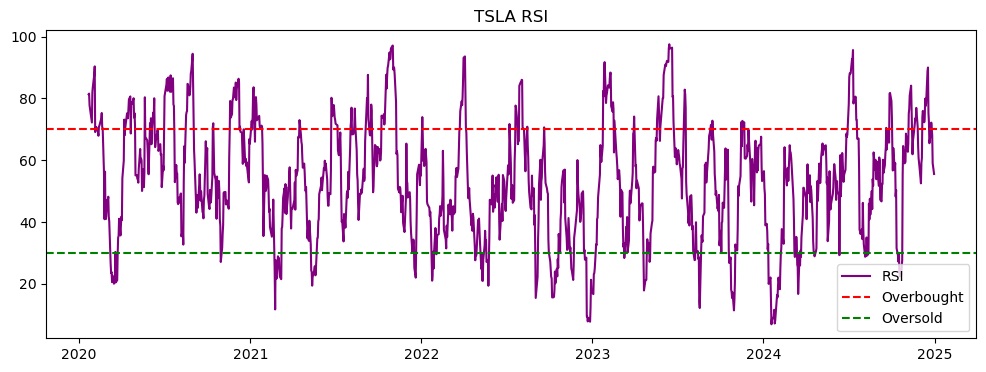

In [14]:
# Plot RSI
plt.figure(figsize=(12,4))
plt.plot(stock_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f'{ticker} RSI')
plt.legend()
plt.show()

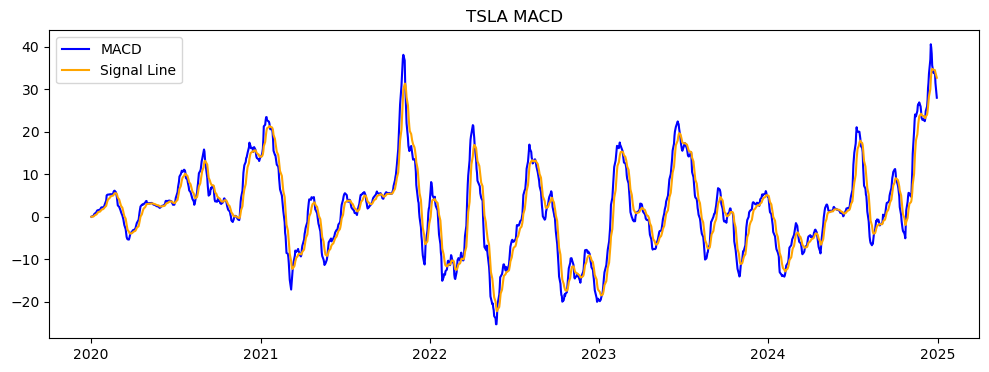

In [16]:
# Plot MACD
plt.figure(figsize=(12,4))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['Signal Line'], label='Signal Line', color='orange')
plt.title(f'{ticker} MACD')
plt.legend()
plt.show()

In [18]:
# Step 7: Conclusion
print("Insights:")
print("- Use MA and RSI to determine potential buy/sell signals.")
print("- Sudden volatility spikes can signal caution or major news impact.")
print("- MACD crossovers help confirm trend reversals.")

Insights:
- Use MA and RSI to determine potential buy/sell signals.
- Sudden volatility spikes can signal caution or major news impact.
- MACD crossovers help confirm trend reversals.
